# 1. Import Library

In [65]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 2. Load Dataset

In [66]:
PROVINCE_NAMES = [
    'Hà Giang', 'Cao Bằng', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ', 'Thái Nguyên', 'Bắc Kạn', 'Tuyên Quang', 
    'Lào Cai', 'Yên Bái', 'Lai Châu', 'Sơn La', 'Điện Biên', 'Hòa Bình', 'Hà Nội', 'Hải Phòng', 'Hải Dương', 
    'Hưng Yên', 'Vĩnh Phúc', 'Bắc Ninh', 'Thái Bình', 'Nam Định', 'Hà Nam', 'Ninh Bình', 'Quảng Ninh', 
    'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 
    'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 
    'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'TP. Hồ Chí Minh', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'Bình Dương', 
    'Bình Phước', 'Tây Ninh', 'TP. Cần Thơ', 'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 
    'An Giang', 'Đồng Tháp', 'Kiên Giang', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau'
]

In [67]:
YEARS = [2018, 2019, 2020, 2021, 2022, 2023]

In [68]:
path_university_score = r"..\DATA\CLEAN DATA\Điểm thi THPTQG [2018-2023]\university_scores_clean.csv"
path_education_investment = r"..\DATA\CLEAN DATA\Đầu tư giáo dục [2018-2023]\clean_education_data.csv"
path_population_density = r"..\DATA\CLEAN DATA\Dân số và mật độ dân số [2018-2022]\clean_population.csv"
path_income = r"..\DATA\CLEAN DATA\Chỉ số thu nhập [2018-2020]\Chỉ số thu nhập [2018-2020].csv"
path_health_index = r"..\DATA\CLEAN DATA\Chỉ số sức khỏe [2018-2020]\Chỉ số sức khỏe [2018-2020].csv"
path_human_development_index = r"..\DATA\CLEAN DATA\Chỉ số phát triển con người [2018-2020]\Chỉ số phát triển con người [2018-2020].csv"
path_education_index = r"..\DATA\CLEAN DATA\Chỉ số giáo dục [2018-2020]\Chỉ số giáo dục [2018-2020].csv"
path_economic_regions = r"..\DATA\CLEAN DATA\6 vùng kinh tế\regions_data.csv"

# List các đường dẫn
paths = [
    path_university_score,
    path_education_investment,
    path_population_density,
    path_income,
    path_health_index,
    path_human_development_index,
    path_education_index,
    path_economic_regions
]

In [69]:
for path in paths:
    print("File:", path)
    try:
        df = pd.read_csv(path)
        print(df.info())  # In ra thông tin về cấu trúc của DataFrame
        print("Số lượng giá trị null trong từng cột:")
        print(df.isnull().sum())  # In ra số lượng giá trị null trong mỗi cột
        print("\n")
    except FileNotFoundError:
        print("File not found.")

File: ..\DATA\CLEAN DATA\Điểm thi THPTQG [2018-2023]\university_scores_clean.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Địa phương  378 non-null    object 
 1   Năm         378 non-null    int64  
 2   Giá trị     378 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.0+ KB
None
Số lượng giá trị null trong từng cột:
Địa phương    0
Năm           0
Giá trị       0
dtype: int64


File: ..\DATA\CLEAN DATA\Đầu tư giáo dục [2018-2023]\clean_education_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Địa phương             295 non-null    object 
 1   Năm                    295 non-null    int64  
 2   Chi tiêu cho giáo dục  295 non-null    float64


# 3.Joining Tables to Create a Unified Dataset for Multivariate Relationship Analysis

In [70]:
data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: np.nan)))

## 3.1 Process University Scores

In [71]:
df = pd.read_csv(path_university_score)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Giá trị')

for province in PROVINCE_NAMES:
    for year in YEARS:
        data[province][year]["university_score"] = df_pivot[province][year]

print(df_pivot['Đà Nẵng'][2023])
print(data['Đà Nẵng'][2023]['university_score'])


6.265920651068158
6.265920651068158


## 3.2 Process Economic Zone

In [72]:
df = pd.read_csv(path_economic_regions)

for province in PROVINCE_NAMES:
    for year in YEARS:
        # Lọc dữ liệu cho tỉnh và in ra cột "Vùng kinh tế - Xã hội"
        data[province][year]["economic_zone"] = df[df["Địa phương"] == province]["Vùng kinh tế - Xã hội"].iloc[0]

print(df[df["Địa phương"] == "Đà Nẵng"]['Vùng kinh tế - Xã hội'].iloc[0])
print(data["Đà Nẵng"][2018]["economic_zone"])


Vùng Bắc Trung Bộ và duyên hải miền Trung
Vùng Bắc Trung Bộ và duyên hải miền Trung


## 3.3 Process Education Investment

In [73]:
df = pd.read_csv(path_education_investment)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Chi tiêu cho giáo dục')

for province in PROVINCE_NAMES:
    for year in YEARS:
        if province in df_pivot.columns and year in df_pivot.index:
            data[province][year]["education_investment"] = df_pivot[province][year]

print(df_pivot['An Giang'][2018])
print(data['An Giang'][2018]['education_investment'])

0.698327
0.698327


## 3.4 Process Population And Population Density

In [74]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv(path_population_density)

for province in PROVINCE_NAMES:
    for year in YEARS:
        # Kiểm tra xem có tồn tại hàng thỏa mãn điều kiện 'Địa phương' và 'Năm' không
        if ((df['Địa phương'] == province) & (df['Năm'] == year)).any():
            # Lấy dữ liệu từ DataFrame cho province và year tương ứng
            popu_data = df[(df['Địa phương'] == province) & (df['Năm'] == year)]
            population = popu_data['Dân số trung bình (Nghìn người)'].values[0]
            population_density = popu_data['Mật độ dân số (Người/km2)'].values[0]
            data[province][year]["population"] = population
            data[province][year]["population_density"] = population_density

print(df[(df['Địa phương'] == 'Hà Nội') & (df['Năm'] == 2018)]['Dân số trung bình (Nghìn người)'].values[0], df[(df['Địa phương'] == 'Hà Nội') & (df['Năm'] == 2018)]['Mật độ dân số (Người/km2)'].values[0])
print(data["Hà Nội"][2018]['population'], data["Hà Nội"][2018]['population_density'])


7914.5 2356.49
7914.5 2356.49


## 3.5 Process Educational Index

In [75]:
df = pd.read_csv(path_education_index)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Giá trị')

for province in PROVINCE_NAMES:
    for year in range(2018, 2021):
        data[province][year]["education_index"] = df_pivot[province][year]

print(df_pivot['Đà Nẵng'][2018])
print(data['Đà Nẵng'][2018]['education_index'])


0.745
0.745


## 3.6 Process Human Development Index

In [76]:
df = pd.read_csv(path_human_development_index)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Giá trị')

for province in PROVINCE_NAMES:
    for year in range(2018, 2021):
        data[province][year]["human_development_index"] = df_pivot[province][year]

print(df_pivot['Đà Nẵng'][2018])
print(data['Đà Nẵng'][2018]['human_development_index'])


0.773
0.773


## 3.7 Process Health Index

In [77]:
df = pd.read_csv(path_health_index)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Giá trị')

for province in PROVINCE_NAMES:
    for year in range(2018, 2021):
        data[province][year]["health_index"] = df_pivot[province][year]

print(df_pivot['Đà Nẵng'][2018])
print(data['Đà Nẵng'][2018]['health_index'])


0.862
0.862


## 3.8 Process Income Index

In [78]:
df = pd.read_csv(path_income)

# Pivot DataFrame để có các tỉnh thành làm cột
df_pivot = df.pivot(index='Năm', columns='Địa phương', values='Giá trị')

for province in PROVINCE_NAMES:
    for year in range(2018, 2021):
        data[province][year]["income_index"] = df_pivot[province][year]

print(df_pivot['Đà Nẵng'][2018])
print(data['Đà Nẵng'][2018]['income_index'])


0.719
0.719


In [79]:
# Đường dẫn đến file CSV
csv_file = 'Multivariate-data.csv'

# Ghi dữ liệu vào file CSV
with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Viết header
    writer.writerow(['Địa phương', 'Năm', 'Vùng kinh tế', 'Tiền đầu tư giáo dục', 
                     'Dân số trung bình (Nghìn người)', 'Mật độ dân số (Người/km2)', 'Chỉ số Giáo dục',
                     'Chỉ số phát triển con người', 'Chỉ số sức khỏe', 'Chỉ số thu nhập', 
                     'Điểm thi đại học trung bình của địa phương'])

    for province in PROVINCE_NAMES:
        for year in YEARS:
            writer.writerow(
                            [province,
                            year, 
                            data[province][year]['economic_zone'],
                            data[province][year]['education_investment'],
                            data[province][year]['population'],
                            data[province][year]['population_density'],
                            data[province][year]['education_index'],
                            data[province][year]['human_development_index'],
                            data[province][year]['health_index'],
                            data[province][year]['income_index'],
                            data[province][year]['university_score']]
                            )

In [80]:
df = pd.read_csv(r"Multivariate-data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Địa phương                                  378 non-null    object 
 1   Năm                                         378 non-null    int64  
 2   Vùng kinh tế                                378 non-null    object 
 3   Tiền đầu tư giáo dục                        295 non-null    float64
 4   Dân số trung bình (Nghìn người)             315 non-null    float64
 5   Mật độ dân số (Người/km2)                   315 non-null    float64
 6   Chỉ số Giáo dục                             189 non-null    float64
 7   Chỉ số phát triển con người                 189 non-null    float64
 8   Chỉ số sức khỏe                             189 non-null    float64
 9   Chỉ số thu nhập                             189 non-null    float64
 10  Điểm thi đại h

In [81]:
df.isnull().sum()


Địa phương                                      0
Năm                                             0
Vùng kinh tế                                    0
Tiền đầu tư giáo dục                           83
Dân số trung bình (Nghìn người)                63
Mật độ dân số (Người/km2)                      63
Chỉ số Giáo dục                               189
Chỉ số phát triển con người                   189
Chỉ số sức khỏe                               189
Chỉ số thu nhập                               189
Điểm thi đại học trung bình của địa phương      0
dtype: int64

In [82]:
df.describe()


,Năm,Tiền đầu tư giáo dục,Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Chỉ số Giáo dục,Chỉ số phát triển con người,Chỉ số sức khỏe,Chỉ số thu nhập,Điểm thi đại học trung bình của địa phương
count,378.000000,295.000000,315.000000,315.000000,189.000000,189.000000,189.000000,189.000000,378.000000
mean,2020.500000,0.930073,1547.404571,519.513683,0.603884,0.687116,0.818688,0.659238,6.026370
std,1.710089,0.861202,1444.903457,671.496318,0.070226,0.049934,0.037324,0.065808,0.967508
min,2018.000000,0.000001,312.000000,50.000000,0.441000,0.565000,0.703000,0.532000,3.690686
25%,2019.000000,0.526685,875.300000,138.000000,0.546000,0.656000,0.807000,0.616000,5.351556
50%,2020.500000,0.730692,1233.100000,272.000000,0.607000,0.683000,0.826000,0.647000,5.935970
75%,2022.000000,1.007667,1687.000000,670.000000,0.652000,0.712000,0.842000,0.684000,6.716655
max,2023.000000,10.308810,9389.720000,4481.000000,0.790000,0.799000,0.872000,0.906000,8.283732


In [83]:
df.head()

,Địa phương,Năm,Vùng kinh tế,Tiền đầu tư giáo dục,Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Chỉ số Giáo dục,Chỉ số phát triển con người,Chỉ số sức khỏe,Chỉ số thu nhập,Điểm thi đại học trung bình của địa phương
0,Hà Giang,2018,Vùng trung du và miền núi phía Bắc,0.434603,846.50,106.75,0.462,0.565,0.734,0.532,4.382694
1,Hà Giang,2019,Vùng trung du và miền núi phía Bắc,0.485911,858.10,108.00,0.482,0.579,0.737,0.545,4.215383
2,Hà Giang,2020,Vùng trung du và miền núi phía Bắc,0.422106,870.24,110.00,0.500,0.591,0.745,0.555,5.221484
3,Hà Giang,2021,Vùng trung du và miền núi phía Bắc,0.474379,887.09,112.00,NaN,NaN,NaN,NaN,5.680538
4,Hà Giang,2022,Vùng trung du và miền núi phía Bắc,0.554896,892.72,113.00,NaN,NaN,NaN,NaN,5.299501


## 4. Finding Multivariate Relationships

### 4.1 Drop Nan Values

In [84]:
# Đọc dữ liệu từ file CSV gốc
df = pd.read_csv("Multivariate-data.csv")

# Loại bỏ các hàng có chứa giá trị NaN
df_cleaned = df.dropna()

# Lưu DataFrame mới thành file CSV
df_cleaned.to_csv("[Dropped-nan] Multivariate-data.csv", index=False)

In [85]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 374
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Địa phương                                  177 non-null    object 
 1   Năm                                         177 non-null    int64  
 2   Vùng kinh tế                                177 non-null    object 
 3   Tiền đầu tư giáo dục                        177 non-null    float64
 4   Dân số trung bình (Nghìn người)             177 non-null    float64
 5   Mật độ dân số (Người/km2)                   177 non-null    float64
 6   Chỉ số Giáo dục                             177 non-null    float64
 7   Chỉ số phát triển con người                 177 non-null    float64
 8   Chỉ số sức khỏe                             177 non-null    float64
 9   Chỉ số thu nhập                             177 non-null    float64
 10  Điểm thi đại học tr

In [86]:
df_cleaned.isnull().sum()


Địa phương                                    0
Năm                                           0
Vùng kinh tế                                  0
Tiền đầu tư giáo dục                          0
Dân số trung bình (Nghìn người)               0
Mật độ dân số (Người/km2)                     0
Chỉ số Giáo dục                               0
Chỉ số phát triển con người                   0
Chỉ số sức khỏe                               0
Chỉ số thu nhập                               0
Điểm thi đại học trung bình của địa phương    0
dtype: int64

In [87]:
df_cleaned.describe()


,Năm,Tiền đầu tư giáo dục,Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Chỉ số Giáo dục,Chỉ số phát triển con người,Chỉ số sức khỏe,Chỉ số thu nhập,Điểm thi đại học trung bình của địa phương
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,2019.000000,0.902585,1553.518983,532.979718,0.604237,0.687525,0.818508,0.660232,5.541623
std,0.818813,0.690832,1472.609822,682.737405,0.071499,0.051474,0.038351,0.067575,0.854289
min,2018.000000,0.000001,312.000000,50.000000,0.441000,0.565000,0.703000,0.532000,3.690686
25%,2018.000000,0.513999,858.100000,135.000000,0.546000,0.654000,0.807000,0.615000,4.884118
50%,2019.000000,0.733744,1232.800000,290.000000,0.608000,0.683000,0.826000,0.648000,5.450610
75%,2020.000000,1.007791,1718.100000,693.000000,0.652000,0.719000,0.843000,0.685000,6.150384
max,2020.000000,4.245046,9227.600000,4404.000000,0.790000,0.799000,0.872000,0.906000,7.738906


In [88]:
df_cleaned.head()

,Địa phương,Năm,Vùng kinh tế,Tiền đầu tư giáo dục,Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Chỉ số Giáo dục,Chỉ số phát triển con người,Chỉ số sức khỏe,Chỉ số thu nhập,Điểm thi đại học trung bình của địa phương
0,Hà Giang,2018,Vùng trung du và miền núi phía Bắc,0.434603,846.50,106.75,0.462,0.565,0.734,0.532,4.382694
1,Hà Giang,2019,Vùng trung du và miền núi phía Bắc,0.485911,858.10,108.00,0.482,0.579,0.737,0.545,4.215383
2,Hà Giang,2020,Vùng trung du và miền núi phía Bắc,0.422106,870.24,110.00,0.500,0.591,0.745,0.555,5.221484
6,Cao Bằng,2018,Vùng trung du và miền núi phía Bắc,0.750797,528.70,78.91,0.558,0.624,0.777,0.560,4.488041
7,Cao Bằng,2019,Vùng trung du và miền núi phía Bắc,0.704093,530.90,79.00,0.571,0.633,0.778,0.570,4.575898


### 4.2 Overview Of The Relationship Between Variables Using Correlation Map

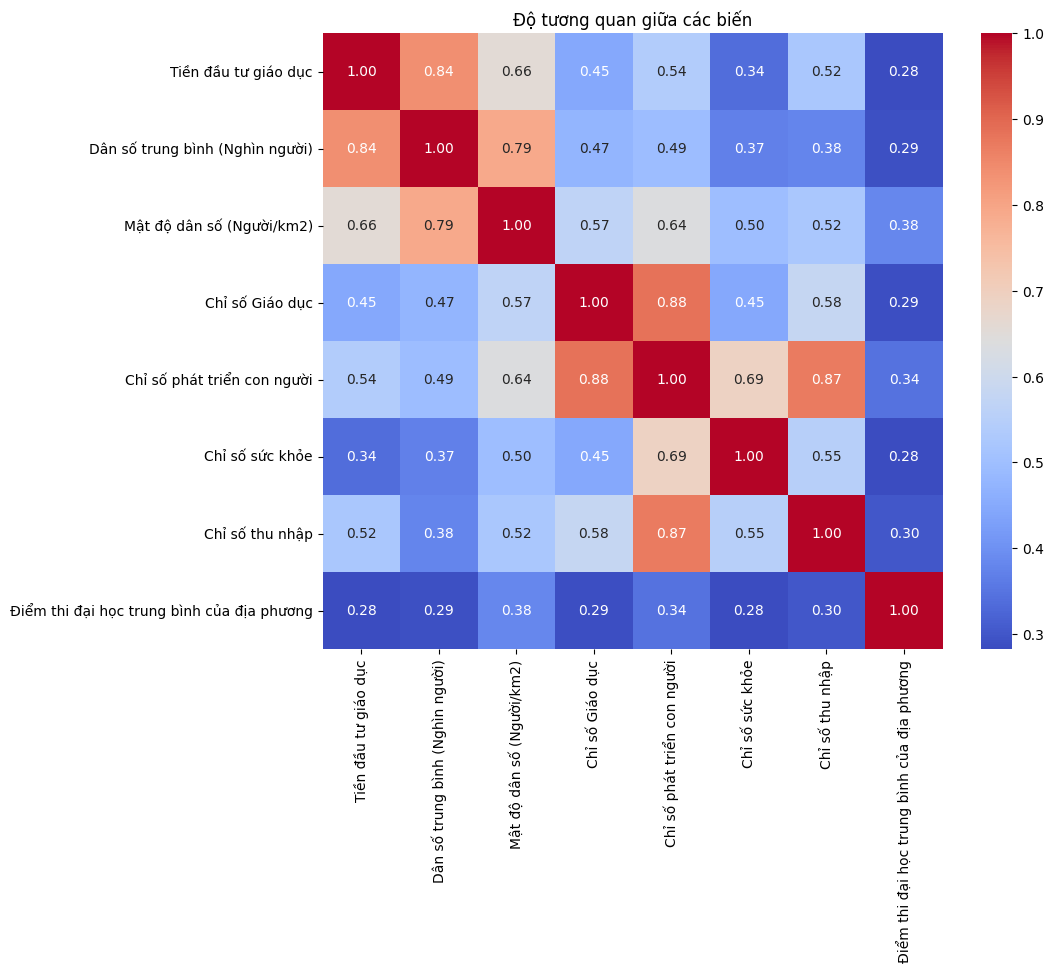

In [100]:
# Bỏ cột 'Năm' từ DataFrame trước khi tính toán ma trận tương quan
df_cleaned_without_year = df_cleaned.drop(columns=['Năm'])

# Tính ma trận tương quan chỉ với các cột chứa giá trị số
corr_matrix = df_cleaned_without_year.corr(numeric_only=True)

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Độ tương quan giữa các biến')
plt.show()


### 4.3 Overview Of The Relationship Between Variables Using ClusterMap

<Figure size 1000x800 with 0 Axes>

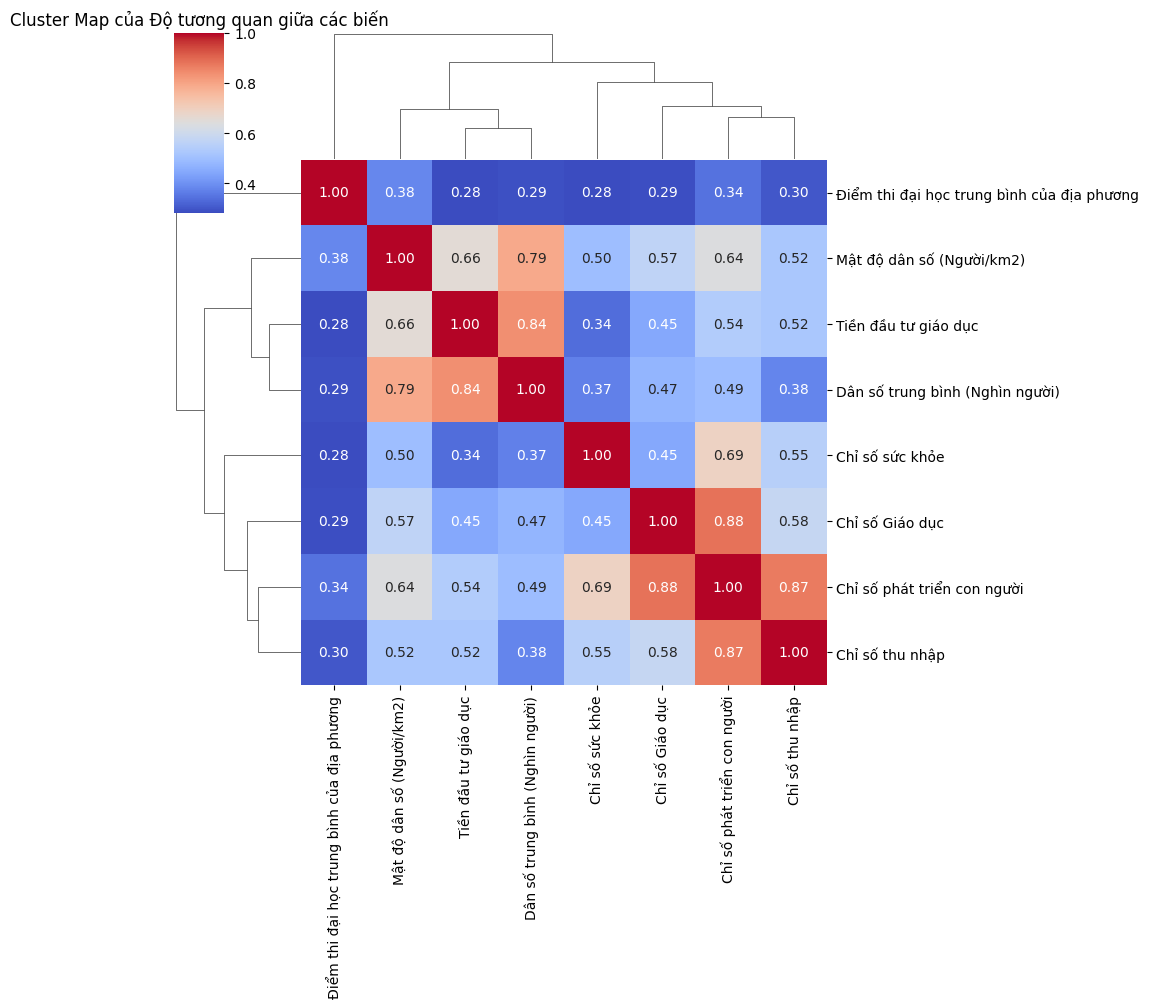

In [106]:
# Bỏ cột 'Năm' từ DataFrame trước khi tính toán ma trận tương quan
df_cleaned_without_year = df_cleaned.drop(columns=['Năm'])

# Tính ma trận tương quan chỉ với các cột chứa giá trị số
corr_matrix = df_cleaned_without_year.corr(numeric_only=True)

# Vẽ biểu đồ cluster map cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cluster Map của Độ tương quan giữa các biến')
plt.show()


### 4.4 Detailview Of The Relationship Between Other Variables And University Entrance Exam Scores

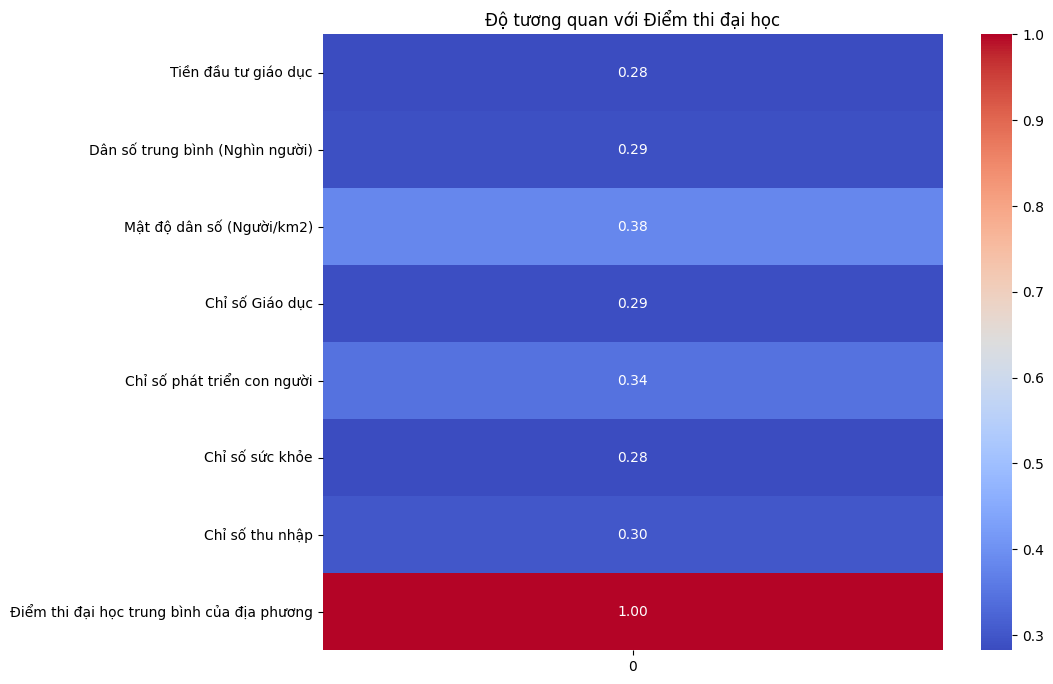

In [104]:
# Loại bỏ các cột không phải số từ DataFrame
numeric_df_cleaned = df_cleaned.select_dtypes(include=[np.number])
numeric_df_cleaned = numeric_df_cleaned.drop(columns=['Năm'])
# Tính ma trận tương quan giữa "Điểm thi đại học" và các biến khác
corr_with_university_score = numeric_df_cleaned.corrwith(df_cleaned['Điểm thi đại học trung bình của địa phương'])

# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_university_score.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Độ tương quan với Điểm thi đại học')
plt.show()


### 4.5 Detailview Of The Relationship Between Economic Zones And University Entrance Exam Scores

In [112]:
# Nhóm các dòng theo cột "Vùng kinh tế" và tính trung bình cho cột "Điểm thi đại học trung bình của địa phương"
diem_trung_binh_theo_vung = df_cleaned.groupby('Vùng kinh tế')['Điểm thi đại học trung bình của địa phương'].mean()

# In ra điểm trung bình cho từng vùng kinh tế
print(diem_trung_binh_theo_vung)


Vùng kinh tế
Vùng Bắc Trung Bộ và duyên hải miền Trung    5.316279
Vùng Tây Nguyên                              5.479624
Vùng trung du và miền núi phía Bắc           5.189539
Vùng Đông Nam Bộ                             6.173747
Vùng đồng bằng sông Cửu Long                 5.492765
Vùng đồng bằng sông Hồng                     6.002145
Name: Điểm thi đại học trung bình của địa phương, dtype: float64


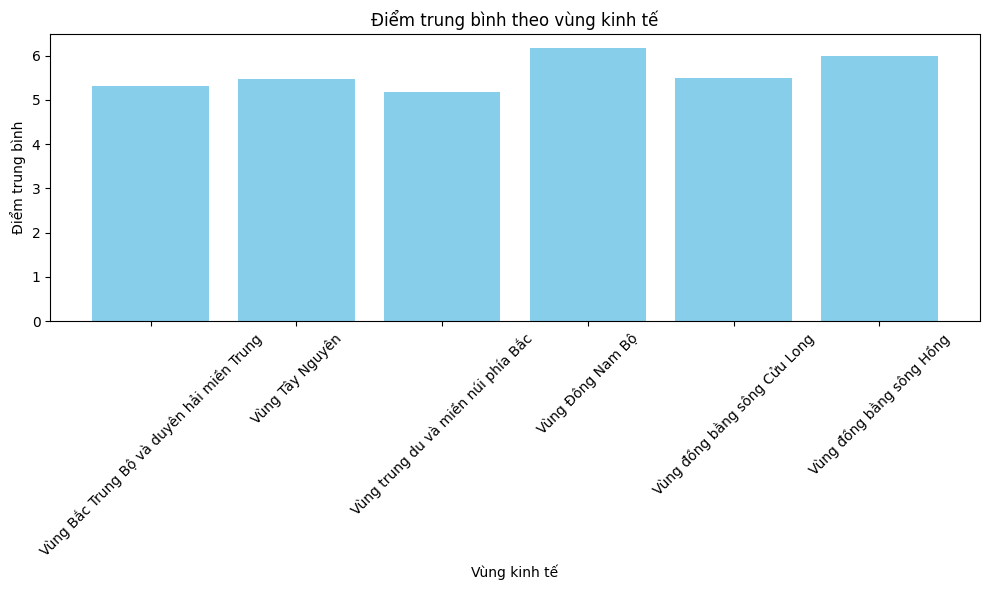

In [113]:
# Tạo list chứa tên các vùng kinh tế
vung_kinh_te = diem_trung_binh_theo_vung.index.tolist()

# Tạo list chứa điểm trung bình cho từng vùng kinh tế
diem_trung_binh = diem_trung_binh_theo_vung.values.tolist()

# Vẽ bar chart
plt.figure(figsize=(10, 6))
plt.bar(vung_kinh_te, diem_trung_binh, color='skyblue')
plt.xlabel('Vùng kinh tế')
plt.ylabel('Điểm trung bình')
plt.title('Điểm trung bình theo vùng kinh tế')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4.6 Detailview Of The Relationship Between Population Density And University Entrance Exam Scores

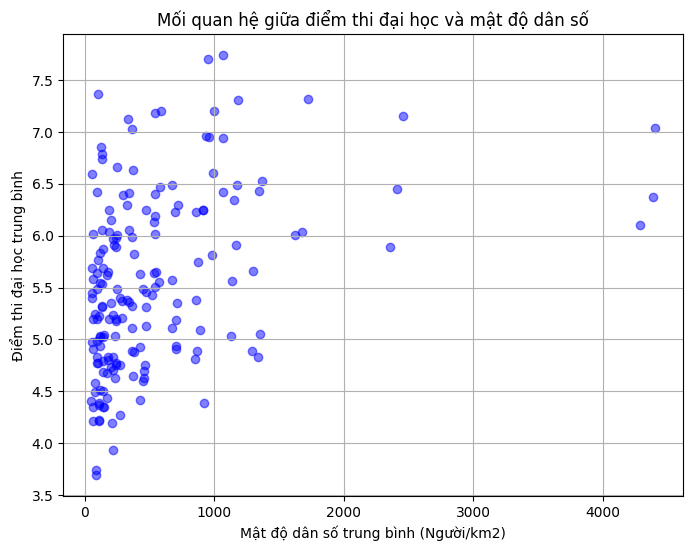

In [117]:
# Tạo scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Mật độ dân số (Người/km2)'], df_cleaned['Điểm thi đại học trung bình của địa phương'], color='blue', alpha=0.5)
plt.title('Mối quan hệ giữa điểm thi đại học và mật độ dân số')
plt.xlabel('Mật độ dân số trung bình (Người/km2)')
plt.ylabel('Điểm thi đại học trung bình')
plt.grid(True)
plt.show()


### 4.7 Detailview Of The Relationship Between Human Development Index And University Entrance Exam Scores

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


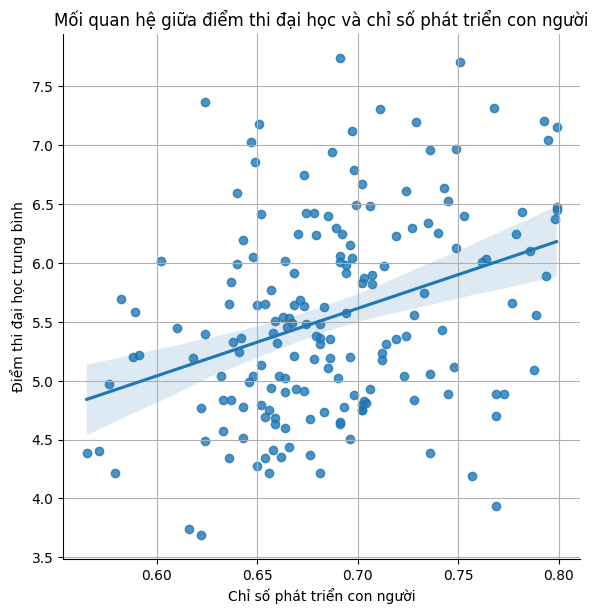

In [120]:
# Tạo lmplot
sns.lmplot(x='Chỉ số phát triển con người', y='Điểm thi đại học trung bình của địa phương', data=df_cleaned, height=6)
plt.title('Mối quan hệ giữa điểm thi đại học và chỉ số phát triển con người')
plt.xlabel('Chỉ số phát triển con người')
plt.ylabel('Điểm thi đại học trung bình')
plt.grid(True)
plt.show()


### 4.8 Detailview Of The Relationship Between Income And University Entrance Exam Scores

In [121]:
from sklearn.manifold import TSNE

# Sử dụng t-SNE để giảm số chiều xuống còn 2 chiều
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_cleaned)

# Tạo scatter plot cho dữ liệu giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], color='blue', alpha=0.5)
plt.title('Biểu đồ t-SNE của dữ liệu')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.show()


ValueError: could not convert string to float: 'Hà Giang'